In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('train housing.csv')
print("The shape of the dataset is {}.".format(df.shape))

The shape of the dataset is (1168, 81).


In [4]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
print('The most expensive house is sold by: {:,.0f}$'.format(df.SalePrice.max()))
print('The cheapest house is sold by: {:,.0f}$'.format(df.SalePrice.min()))
print('Mean SalePrice: {:,.0f}$ , Median SalePrice: {:,.0f}$'.format(df.SalePrice.mean(), df.SalePrice.median()))

The most expensive house is sold by: 755,000$
The cheapest house is sold by: 34,900$
Mean SalePrice: 181,477$ , Median SalePrice: 163,995$


# Clean data with 'NA' type in default to its type in desc.

In [8]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['Alley'] = df['Alley'].fillna('No alley access')
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace') 
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['GarageCond'] = df['GarageCond'].fillna('No Garage')
df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['Fence'] = df['Fence'].fillna('No Fence')
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          1168 non-null   object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [10]:
#Replace nans columns with its median value
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df.shape

(1168, 81)

In [11]:
#Creating List of objects that refers to the columns with type 'object'
lst_objects=[]
for col in df.columns:
    if(df[col].dtype == np.object ):
        #print(col)
        lst_objects.append(col)
print(lst_objects)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


<ipython-input-11-e1d2a0c8f891>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if(df[col].dtype == np.object ):


In [12]:
#We add 'Expensive' feature to help in data visualization
df['Expensive'] = np.where(df.SalePrice >= df.SalePrice.median(), 'Yes', 'No')

In [13]:
(df['Expensive']=='Yes').sum()

584

<AxesSubplot:ylabel='SalePrice'>

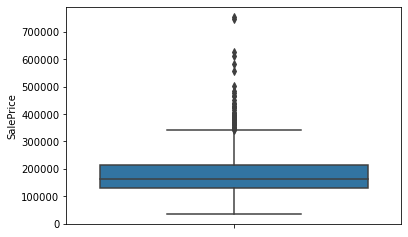

In [14]:
sns.boxplot(y='SalePrice', data=df)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

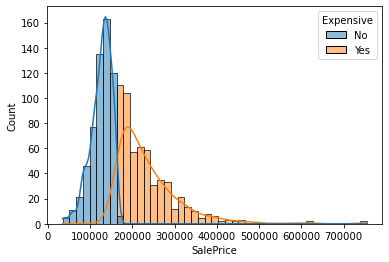

In [15]:
sns.histplot(data=df, x='SalePrice', hue='Expensive', kde=True)

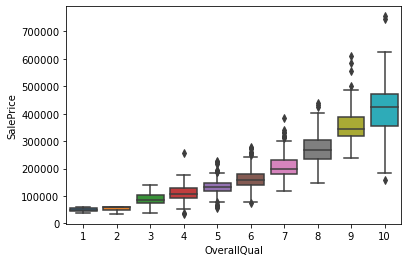

In [16]:
ax = sns.boxplot(x='OverallQual', y='SalePrice', data=df)

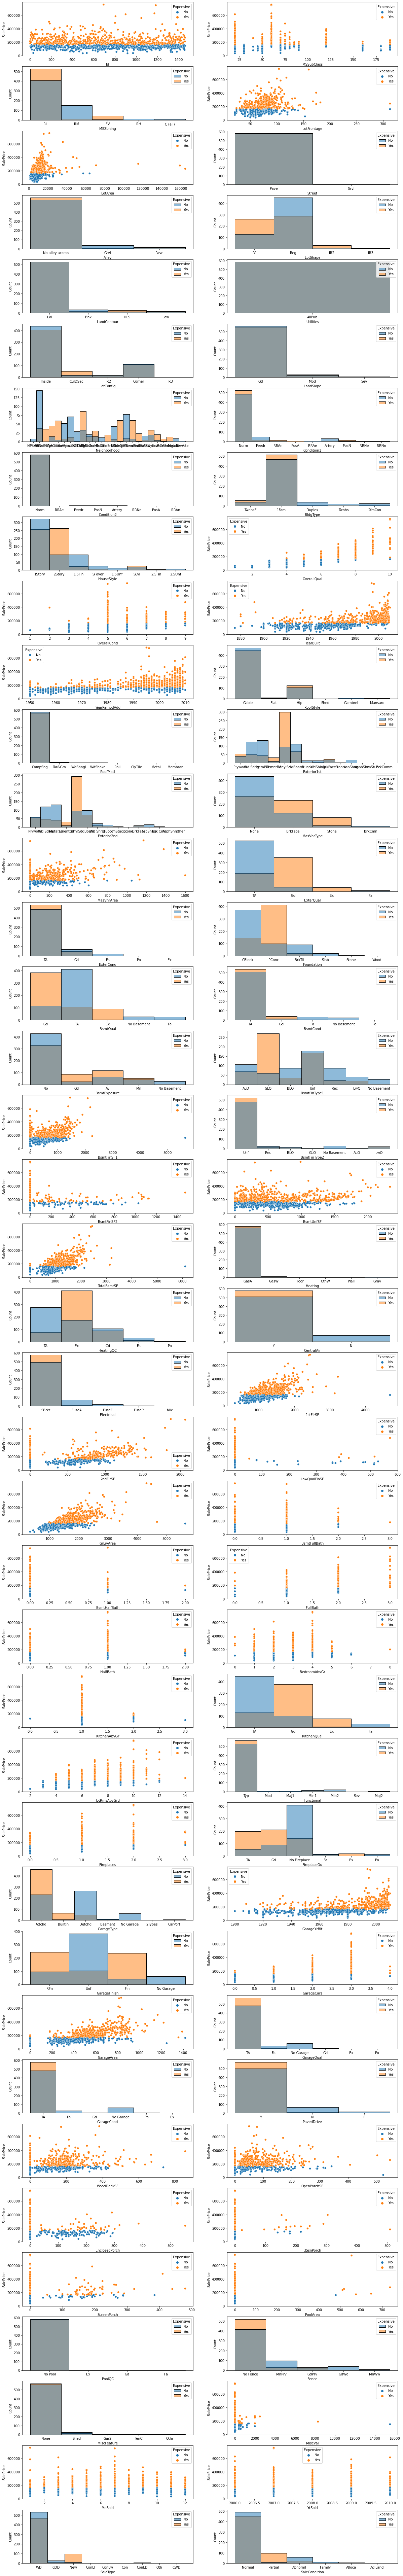

In [17]:
fig, axes=plt.subplots(nrows=40, ncols=2, figsize=(20,140))
col=0
for i in range(40):
    for j in range(2):
        if df.columns[col] in lst_objects:
            sns.histplot(x=df.columns[col], data=df, hue='Expensive', ax=axes[i,j])
        else:
            sns.scatterplot(x=df.columns[col], y='SalePrice', data=df , hue='Expensive',ax=axes[i,j])
        col+=1

In [18]:
#Remove 'Expensive' from data
df.drop(columns=['Expensive'], inplace=True)

In [19]:
#Using Label Encoding for categorical features
from sklearn.preprocessing import LabelEncoder
df[lst_objects] = df[lst_objects].astype('category')
labelencoder = LabelEncoder()
for col in lst_objects:
    df[col]= labelencoder.fit_transform(df[col])
#Adding 1 for all values of label encoding
df[lst_objects] += 1
df[lst_objects]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,4,2,2,1,4,1,5,1,14,3,...,2,3,6,6,3,4,5,2,9,5
1,4,2,2,1,4,1,5,2,13,3,...,2,4,6,6,3,4,5,2,9,5
2,4,2,2,1,4,1,2,1,16,3,...,2,4,6,6,3,4,5,2,9,5
3,4,2,2,1,4,1,5,1,15,3,...,2,3,6,6,3,4,3,2,1,5
4,4,2,2,1,4,1,3,1,15,3,...,2,1,6,6,3,4,5,2,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,4,2,2,1,4,1,5,1,20,3,...,6,4,6,6,3,4,3,2,9,5
1164,4,2,2,4,4,1,5,1,8,2,...,6,1,6,6,1,4,3,2,9,5
1165,4,2,2,4,4,1,3,1,14,3,...,2,4,6,6,3,4,5,2,9,5
1166,1,2,3,4,4,1,5,1,10,2,...,6,4,6,2,1,4,3,2,9,5


In [20]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,4,70.0,4928,2,2,1,4,1,...,0,4,5,2,0,2,2007,9,5,128000
1,889,20,4,95.0,15865,2,2,1,4,1,...,0,4,5,2,0,10,2007,9,5,268000
2,793,60,4,92.0,9920,2,2,1,4,1,...,0,4,5,2,0,6,2007,9,5,269790
3,110,20,4,105.0,11751,2,2,1,4,1,...,0,4,3,2,0,1,2010,1,5,190000
4,422,20,4,70.0,16635,2,2,1,4,1,...,0,4,5,2,0,6,2009,9,5,215000


# Training over Data using Linear regression Using RMSE for evaluation

In [21]:
#Spliting Data into train and validation
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_df.drop(columns=['Id','SalePrice'])
y_train = train_df['SalePrice']

X_val = val_df.drop(columns=['Id','SalePrice'])
y_val = val_df['SalePrice']

In [22]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

pred_val= model.predict(X_val)
print("RMSE is :", mean_squared_error(y_val, pred_val, squared=False))

RMSE is : 47090.843835589105


In [23]:
#XGBRegressor Model
from xgboost import XGBRegressor

# Define  model as an object of XGBRegressor
model_XGboost = XGBRegressor(n_estimators=350,max_depth=15,learning_rate=.1,random_state=1,
                     n_jobs=10, subsample=1,min_child_weight=0.6) # Your code here

# Fit the model
model_XGboost.fit(X_train, y_train)

# Get validation predictions using RMSE
pred_val_xgboost = model_XGboost.predict(X_val)
print("RMSE is :", mean_squared_error(y_val, pred_val_xgboost, squared=False))

RMSE is : 34386.79299677859


In [24]:
#Evaluating Over Testing
test_df = pd.read_csv('test housing.csv')
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


# Data Preprocessing

In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [26]:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].median())
test_df['Alley'] = test_df['Alley'].fillna('No alley access')
test_df['BsmtQual'] = test_df['BsmtQual'].fillna('No Basement')
test_df['BsmtCond'] = test_df['BsmtCond'].fillna('No Basement')
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna('No Basement')
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna('No Basement')
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna('No Basement')
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna('No Fireplace') 
test_df['GarageType'] = test_df['GarageType'].fillna('No Garage')
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
test_df['GarageFinish'] = test_df['GarageFinish'].fillna('No Garage')
test_df['GarageQual'] = test_df['GarageQual'].fillna('No Garage')
test_df['GarageCond'] = test_df['GarageCond'].fillna('No Garage')
test_df['PoolQC'] = test_df['PoolQC'].fillna('No Pool')
test_df['Fence'] = test_df['Fence'].fillna('No Fence')
test_df['MiscFeature'] = test_df['MiscFeature'].fillna('None')

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    292 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          292 non-null    object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [28]:
test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0], inplace=True)
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].median(), inplace=True)
test_df['Electrical'].fillna(test_df['Electrical'].mode()[0],inplace=True)
test_df.shape

(292, 80)

In [29]:
#Label Encoding for categorial features
test_df[lst_objects] = test_df[lst_objects].astype('category')
labelencoder = LabelEncoder()
for col in lst_objects:
    test_df[col]= labelencoder.fit_transform(test_df[col])
    
#Adding 1 for all values of label encoding
test_df[lst_objects] += 1
test_df[lst_objects]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,2,2,1,2,1,1,1,22,3,...,2,1,6,6,3,1,5,1,6,3
1,3,2,2,1,4,1,2,1,22,3,...,2,3,6,6,3,1,5,1,1,1
2,3,2,2,4,4,1,5,1,5,3,...,2,3,6,6,3,1,5,1,6,3
3,3,2,2,4,1,1,5,1,6,3,...,2,4,6,6,3,1,5,1,6,3
4,3,2,2,1,4,1,2,1,21,2,...,4,1,6,6,3,1,5,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,3,2,2,4,4,1,5,1,21,3,...,2,3,6,6,3,1,5,1,6,3
288,3,2,2,2,4,1,5,1,5,3,...,6,4,6,6,3,1,5,1,6,3
289,3,2,2,1,4,1,2,1,12,3,...,2,1,6,6,3,1,5,3,6,3
290,4,2,2,4,4,1,1,1,3,2,...,6,4,6,6,3,1,5,1,6,3


In [30]:
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,3,86.0,14157,2,2,1,2,1,...,0,0,1,5,1,0,7,2007,6,3
1,1018,120,3,65.0,5814,2,2,1,4,1,...,0,0,1,5,1,0,8,2009,1,1
2,929,20,3,65.0,11838,2,2,4,4,1,...,0,0,1,5,1,0,6,2009,6,3
3,1148,70,3,75.0,12000,2,2,4,1,1,...,0,0,1,5,1,0,7,2009,6,3
4,1227,60,3,86.0,14598,2,2,1,4,1,...,0,0,1,5,1,0,1,2008,6,3


# Predicting the test 'SalePrice' using XGRegressor Model

In [31]:
X_test = test_df.drop(columns=['Id'])

y_test_predicted = model_XGboost.predict(X_test)

test_df['SalePrice'] = y_test_predicted

test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,337,20,3,86.0,14157,2,2,1,2,1,...,0,1,5,1,0,7,2007,6,3,413359.375000
1,1018,120,3,65.0,5814,2,2,1,4,1,...,0,1,5,1,0,8,2009,1,1,216874.062500
2,929,20,3,65.0,11838,2,2,4,4,1,...,0,1,5,1,0,6,2009,6,3,259796.656250
3,1148,70,3,75.0,12000,2,2,4,1,1,...,0,1,5,1,0,7,2009,6,3,169648.640625
4,1227,60,3,86.0,14598,2,2,1,4,1,...,0,1,5,1,0,1,2008,6,3,195119.718750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,3,78.0,10206,2,2,4,4,1,...,0,1,5,1,0,10,2008,6,3,232562.468750
288,1048,20,3,57.0,9245,2,2,2,4,1,...,0,1,5,1,0,2,2008,6,3,138845.906250
289,17,20,3,65.0,11241,2,2,1,4,1,...,0,1,5,3,700,3,2010,6,3,144534.984375
290,523,50,4,50.0,5000,2,2,4,4,1,...,0,1,5,1,0,10,2006,6,3,146468.750000


In [32]:
test_df[['Id', 'SalePrice']].to_csv('submission.csv', index=False)